<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/Forecasting_(Tecnologia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting** (Tecnologia)

**Forecasting** es el proceso de predecir eventos futuros basados en patrones históricos y datos existentes.

El objetivo principal es el de hacer predicciones precisas sobre el futuro utilizando datos pasados y presentes y se utiliza en una amplia variaedad de constextos, como en finanzas, meteorologia, ventas entre otros

## 1. Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import tensorflow as tf

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Bidirectional
#from tensorflow.keras.layers import Dropout
#from tensorflow.keras.layers import Dropout, Flatten

import warnings
warnings.filterwarnings("ignore")

## 2. Carga de datos

In [2]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/Final.csv')
data.head()

,Any,Trimestre,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Unitario,ParadosReg,Sin_Estudios,...,Internet,Movil,Index_Turisme,Index_Motos,Index_Ciclomotors,Index_Furgonetes,Index_Camions,Index_Resta,Zona Verde (m²),m² por habitante
0,2014,1,1,1,Ciutat Vella,1,el Raval,2813.0,4588,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
1,2014,1,2,1,Ciutat Vella,1,el Raval,2813.0,4539,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
2,2014,1,3,1,Ciutat Vella,1,el Raval,2813.0,4572,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
3,2014,2,4,1,Ciutat Vella,1,el Raval,2948.8,4510,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2
4,2014,2,5,1,Ciutat Vella,1,el Raval,2948.8,4379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,628919.0,6.2


In [3]:
print(data.dtypes)

Any                             int64
Trimestre                       int64
Mes                             int64
Codi_Districte                  int64
Nom_Districte                  object
Codi_Barri                      int64
Nom_Barri                      object
Compraventa_Unitario          float64
ParadosReg                      int64
Sin_Estudios                  float64
Solo_Estudios_Obligatorios    float64
Bachillerato                  float64
Estudios_Universitarios       float64
Estudios_Obligatorios         float64
ConsumIndustria               float64
ConsumResidencial             float64
ConsumServeis                 float64
Pm25                          float64
Pm10                          float64
Participacion                 float64
AñosEspVida                   float64
Internet                      float64
Movil                         float64
Index_Turisme                 float64
Index_Motos                   float64
Index_Ciclomotors             float64
Index_Furgon

## 3. Preparacion de los datos

Ahora comprobamos cuantos valores NaN alberga el dataframe

In [4]:
data.isnull().sum()

Any                              0
Trimestre                        0
Mes                              0
Codi_Districte                   0
Nom_Districte                    0
Codi_Barri                       0
Nom_Barri                        0
Compraventa_Unitario             0
ParadosReg                       0
Sin_Estudios                  2409
Solo_Estudios_Obligatorios    2409
Bachillerato                  2409
Estudios_Universitarios       2409
Estudios_Obligatorios         2409
ConsumIndustria               4380
ConsumResidencial             4380
ConsumServeis                 4380
Pm25                          4161
Pm10                          4161
Participacion                    0
AñosEspVida                   3573
Internet                      2409
Movil                         2409
Index_Turisme                 5913
Index_Motos                   5913
Index_Ciclomotors             5913
Index_Furgonetes              5913
Index_Camions                 5913
Index_Resta         

El objetivo principal del TFM es analizar el valor de compraventa en la ciudad de Barcelona a partir de los indicadores de la ISO 37120.

Como serie temporal principal tenemos el valor de compraventa (unitario) por barrio desde 2014 hasta 2023 y por otro lado, tenemos las diferentes series temporales que corresponden a los indicadores.

Como se puede observar muchos de los indicadores obtenidos, tienen valores NaN. Esto se debe a que no hemos obtenido datos en el mismo rango de fechas que la serie principal. Este hecho limita el analisis de datos de forma global, ya que cada indicador tiene su casuistica.

Es por ello que se tendra que realizar el analisis por grupos de indicadores.

*   Paro
*   Estudios
*   Consumo de energia
*   Contaminacion
*   Participacion electoral
*   Esperanza de vida
*   Tecnologia
*   Indice Motor
*   Zonas Verdes

En un principio el estudio se realizara para toda la ciudad de Barcelona.

## 4. Analisis por grupo de indicadores

### 4.2 Tecnologia

In [5]:
df_sel = data[['Any','Trimestre','Mes','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri','Compraventa_Unitario','Internet','Movil']]

In [6]:
df_tecnologia = df_sel.dropna()

In [7]:
df_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6132 entries, 1752 to 7883
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   6132 non-null   int64  
 1   Trimestre             6132 non-null   int64  
 2   Mes                   6132 non-null   int64  
 3   Codi_Districte        6132 non-null   int64  
 4   Nom_Districte         6132 non-null   object 
 5   Codi_Barri            6132 non-null   int64  
 6   Nom_Barri             6132 non-null   object 
 7   Compraventa_Unitario  6132 non-null   float64
 8   Internet              6132 non-null   float64
 9   Movil                 6132 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 527.0+ KB


In [8]:
# Creamos la variable de fecha de la siguiente manera:
# Agregar un día fijo para cada mes, por ejemplo, el día 1
df_tecnologia['Fecha'] = pd.to_datetime(df_tecnologia['Any'].astype(str) + '-' + df_tecnologia['Mes'].astype(str) + '-1')

In [9]:
# Modificamos el indice del dataset por la fecha
df_tecnologiaI = df_tecnologia.set_index('Fecha')

In [10]:
df_tecnologiaI.head()

,Any,Trimestre,Mes,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Unitario,Internet,Movil
Fecha,,,,,,,,,,
2016-01-01,2016,1,1,1,Ciutat Vella,1,el Raval,2813.0,82.8,96.3
2016-02-01,2016,1,2,1,Ciutat Vella,1,el Raval,2813.0,82.8,96.3
2016-03-01,2016,1,3,1,Ciutat Vella,1,el Raval,2813.0,82.8,96.3
2016-04-01,2016,2,4,1,Ciutat Vella,1,el Raval,2948.8,82.8,96.3
2016-05-01,2016,2,5,1,Ciutat Vella,1,el Raval,2948.8,82.8,96.3


##### Analisis Exploratorio

In [11]:
# Agrupamos los datos
df_tecnologiaBarna =df_tecnologiaI.drop(columns=['Any','Trimestre','Mes','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri']).groupby('Fecha').mean()

In [12]:
df_tecnologiaBarna.head()

,Compraventa_Unitario,Internet,Movil
Fecha,,,
2016-01-01,2715.053425,80.175342,96.080822
2016-02-01,2715.053425,80.175342,96.080822
2016-03-01,2715.053425,80.175342,96.080822
2016-04-01,2703.413699,80.175342,96.080822
2016-05-01,2703.413699,80.175342,96.080822


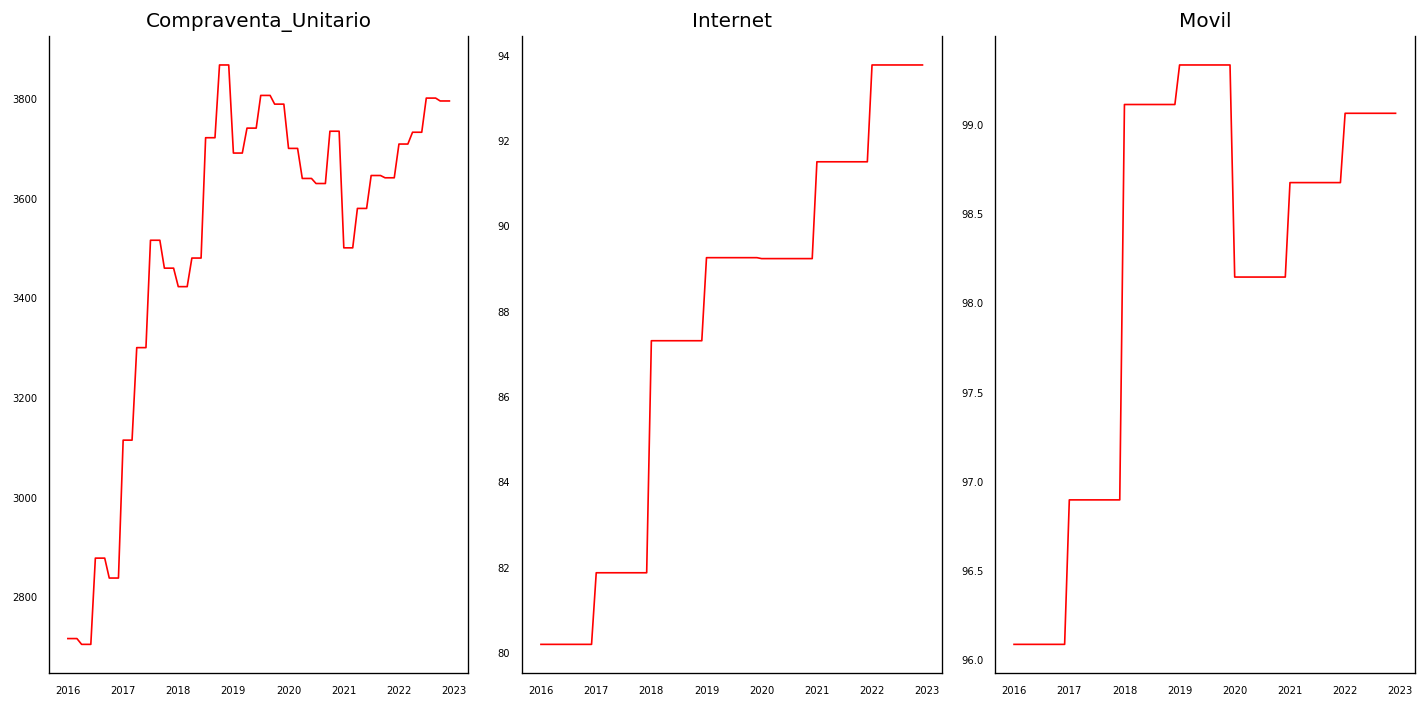

In [13]:
# Visualizando los datos
import seaborn as sb
import matplotlib.pyplot as plt

# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=120, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data = df_tecnologiaBarna[df_tecnologiaBarna.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_tecnologiaBarna.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Cada una de las series tiene patrones de tendencia muy diferentes entre si

In [14]:
corr=df_tecnologiaBarna.corr()
corr

,Compraventa_Unitario,Internet,Movil
Compraventa_Unitario,1.000000,0.816707,0.875041
Internet,0.816707,1.000000,0.864188
Movil,0.875041,0.864188,1.000000


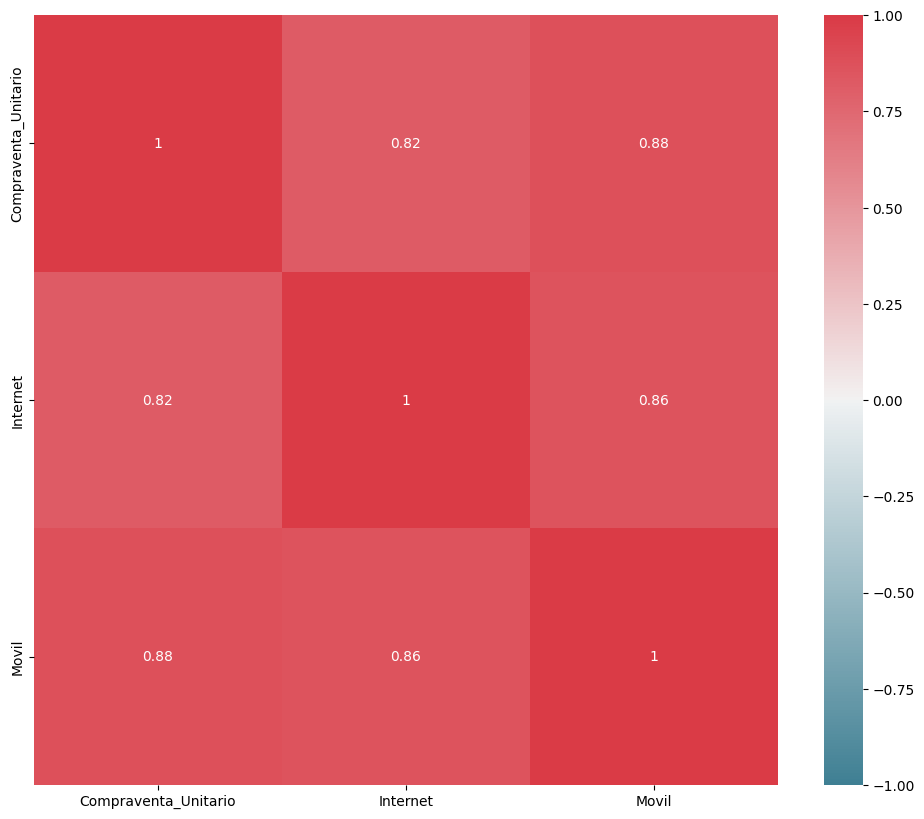

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))

sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,vmax=1, vmin=-1, cmap =sb.diverging_palette(220, 10, as_cmap=True),center=0,ax=ax )
plt.show()

##### Dividir los datos en conjunto de Entrenamiento y Prueba


El modelo VAR se ajustará al conjunto de entrenamiento X_train y luego se utilizará el modelo para pronosticar las observaciones futuras. Estos pronósticos se compararán con los datos reales del conjunto de prueba.



---



In [16]:
fecha_division = '2022-01-01'

X_train, X_test = df_tecnologiaBarna[df_tecnologiaBarna.index<fecha_division], df_tecnologiaBarna[df_tecnologiaBarna.index>=fecha_division]
print(X_train.shape, X_test.shape)


(72, 3) (12, 3)


##### Prueba de estacionariedad

Necesitamos que los datos sean estacionarios para poder usar el modelo VAR. Vamos a averiguarlo haciendo un Test de Dickey-Fuller aumentado, a cada variable univariante que tiene nuestro dataset.

In [17]:
import statsmodels.tsa.stattools as sts

In [18]:
def augmented_dickey_fuller_statistics(time_series):
  result = sts.adfuller(time_series.values)
  print('p-value: %f' % result[1])

print('Test de Dickey-Fuller Aumentado:')
for i in range(len(X_train.columns)):
  print('Serie de tiempo',X_train.columns[i])
  augmented_dickey_fuller_statistics(X_train.iloc[:,i])

Test de Dickey-Fuller Aumentado:
Serie de tiempo Compraventa_Unitario
p-value: 0.218670
Serie de tiempo Internet
p-value: 0.724835
Serie de tiempo Movil
p-value: 0.438215


Los p-valores son mayores que 0.05, con lo cual no se rechaza la hipótesis nula de que la serie no es estacionaria. Habría que transformar los datos porque no se puede confirmar estacionariedad.

In [19]:
X_train_transformed=X_train.diff().dropna()
X_train_transformed.head()

,Compraventa_Unitario,Internet,Movil
Fecha,,,
2016-02-01,0.000000,0.0,0.0
2016-03-01,0.000000,0.0,0.0
2016-04-01,-11.639726,0.0,0.0
2016-05-01,0.000000,0.0,0.0
2016-06-01,0.000000,0.0,0.0


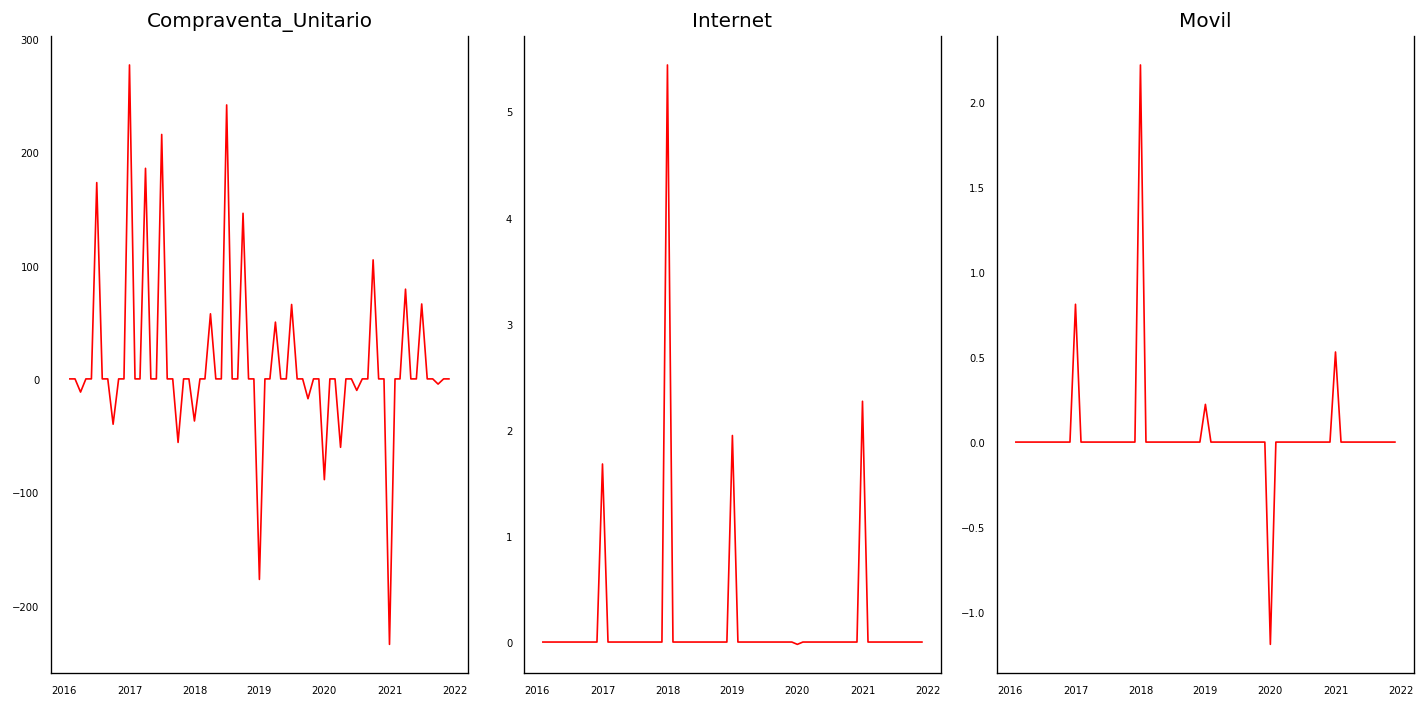

In [20]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=120, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data = X_train_transformed[X_train_transformed.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(X_train_transformed.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [21]:
print('Test de Dickey-Fuller Aumentado 2da vez:')
for i in range(len(X_train_transformed.columns)):
  print('Serie de tiempo transformada', 'Variable', X_train_transformed.columns[i])
  augmented_dickey_fuller_statistics(X_train_transformed.iloc[:,i])

Test de Dickey-Fuller Aumentado 2da vez:
Serie de tiempo transformada Variable Compraventa_Unitario
p-value: 0.000000
Serie de tiempo transformada Variable Internet
p-value: 0.000000
Serie de tiempo transformada Variable Movil
p-value: 0.000000


Todos los p-valores son < 0.05 por lo tanto se podría concluir que con dos órdenes de diferenciación se obtienen series estacionarias.



##### Modelo VAR

VAR requiere la estacionariedad de la serie, lo que significa que la media de la serie no cambia con el tiempo (podemos verlo en el gráfico dibujado junto a la Prueba de Dickey-Fuller aumentada).



In [22]:
from statsmodels.tsa.api import VAR

In [23]:
model = VAR(X_train_transformed)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


###### Seleccionando el orden del modelo

In [30]:
modelsel=model.select_order(16)
modelsel.summary()

,AIC,BIC,FPE,HQIC
0,4.359,4.469*,78.20,4.402
1,4.661,5.099,105.9,4.831
2,4.947,5.714,141.4,5.244
3,5.201,6.296,183.6,5.624
4,5.487,6.910,248.2,6.037
5,5.750,7.501,330.8,6.427
6,5.073,7.153,174.5,5.877
7,5.370,7.778,247.5,6.301
8,5.645,8.383,350.9,6.704
9,5.453,8.518,319.6,6.638


###### Ajustando el modelo

In [31]:
res = model.fit(maxlags=16, ic='aic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 01, May, 2024
Time:                     16:12:40
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    6.62714
Nobs:                     56.0000    HQIC:                   3.57111
Log likelihood:          -146.192    FPE:                    39.4361
AIC:                      1.63609    Det(Omega_mle):         6.52616
--------------------------------------------------------------------
Results for equation Compraventa_Unitario
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                          -19.338095        63.998818           -0.302           0.763
L1.Compraventa_Unitario         -0.010348         0.298731           -0.035           0.972
L

In [32]:
X_train.columns

Index(['Compraventa_Unitario', 'Internet', 'Movil'], dtype='object')

###### Causalidad de Granger

In [33]:
grangercaus=res.test_causality(['Internet', 'Movil'],['Compraventa_Unitario'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
4.746,1.841,0.000,"(30, 30)"


In [34]:
grangercaus=res.test_causality(['Compraventa_Unitario', 'Movil'],['Internet'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.307,1.841,0.234,"(30, 30)"


In [35]:
grangercaus=res.test_causality(['Compraventa_Unitario', 'Internet'],['Movil'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.393,1.841,0.184,"(30, 30)"


###### Matriz de causalidad de Granger


In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings("ignore")
maxlag=16
test = 'ssr_chi2test'
def grangers_causality_matrix(X_train_transformed, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train_transformed[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose:
        print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_y' for var in variables]
  return dataset
grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns)


,Compraventa_Unitario_x,Internet_x,Movil_x
Compraventa_Unitario_y,1.0000,0.0000,0.0009
Internet_y,0.0039,1.0000,0.3680
Movil_y,0.0000,0.8232,1.0000


Vemos que Compraventa_Unitario no es causada ni causa ninguna de las otra variables

###### Diagnosis del modelo


###### Residuos

In [38]:
residuals=res.resid

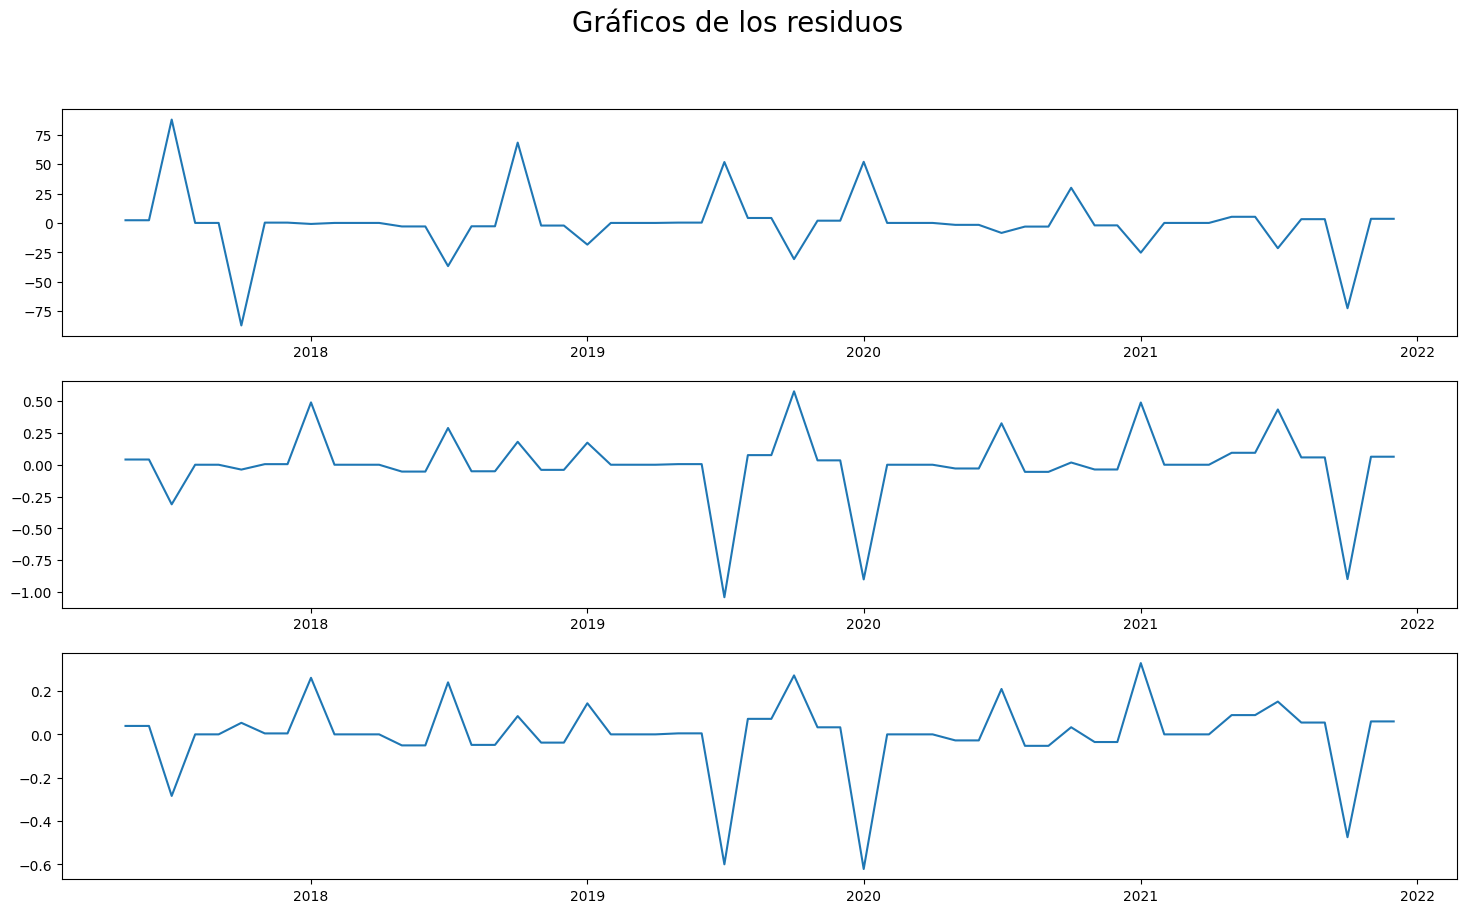

In [39]:
fig, axs = plt.subplots(3)
fig.suptitle('Gráficos de los residuos',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(residuals.iloc[:,i]) for i in range(3)]
plt.show()

###### Dickey - Fuller a los residuos


In [40]:
print('ADF de los Residuos, p-valores:')
[sts.adfuller(residuals.iloc[:,i])[1] for i in range(3)]

ADF de los Residuos, p-valores:


[0.429155942405443, 3.6532898699166135e-08, 0.19381009761834778]

Todos los p-valores son < 0.1 por tanto se rechaza la hipótesis nula de que las 6 series de residuos no son estacionarias, por lo cual con un 90% de confianza se cree que son estacionarias.



###### ACF de los Residuos

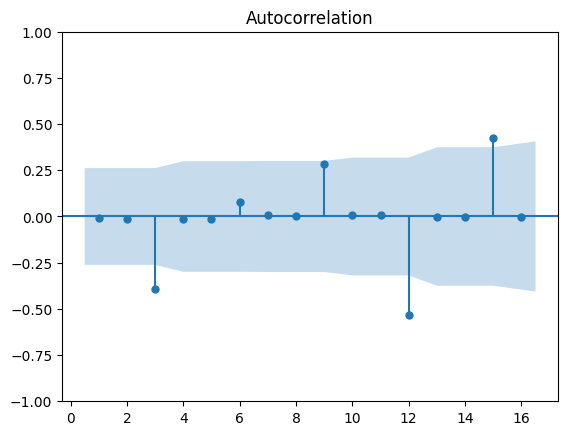

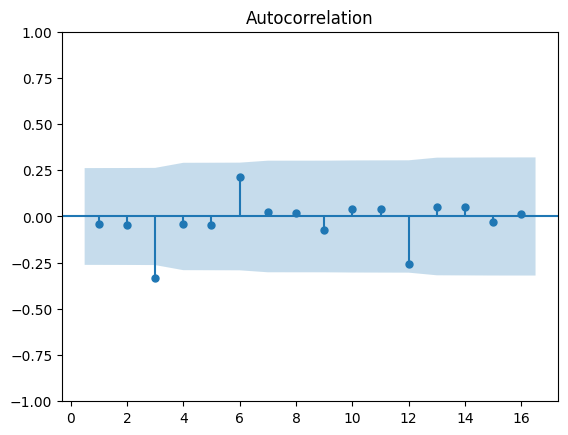

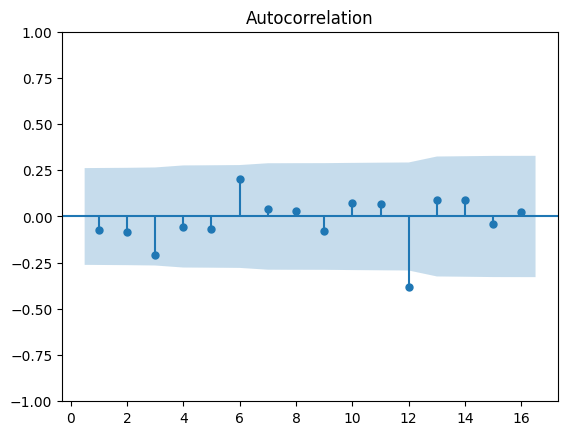

In [41]:
import statsmodels.graphics.tsaplots as sgt
[sgt.plot_acf(residuals.iloc[:,i], zero = False, lags = 16) for i in range(3)]
plt.show()

Conclusión: Los residuos del modelo no presentan estructura de autocorrelación, son estacionarios según los resultados de la prueba de Dickey - Fuller aumentada y en los gráficos se puede comprobar esto visualmente, entonces puede concluirse que son ruido blanco como es deseable.



###### Valores predichos

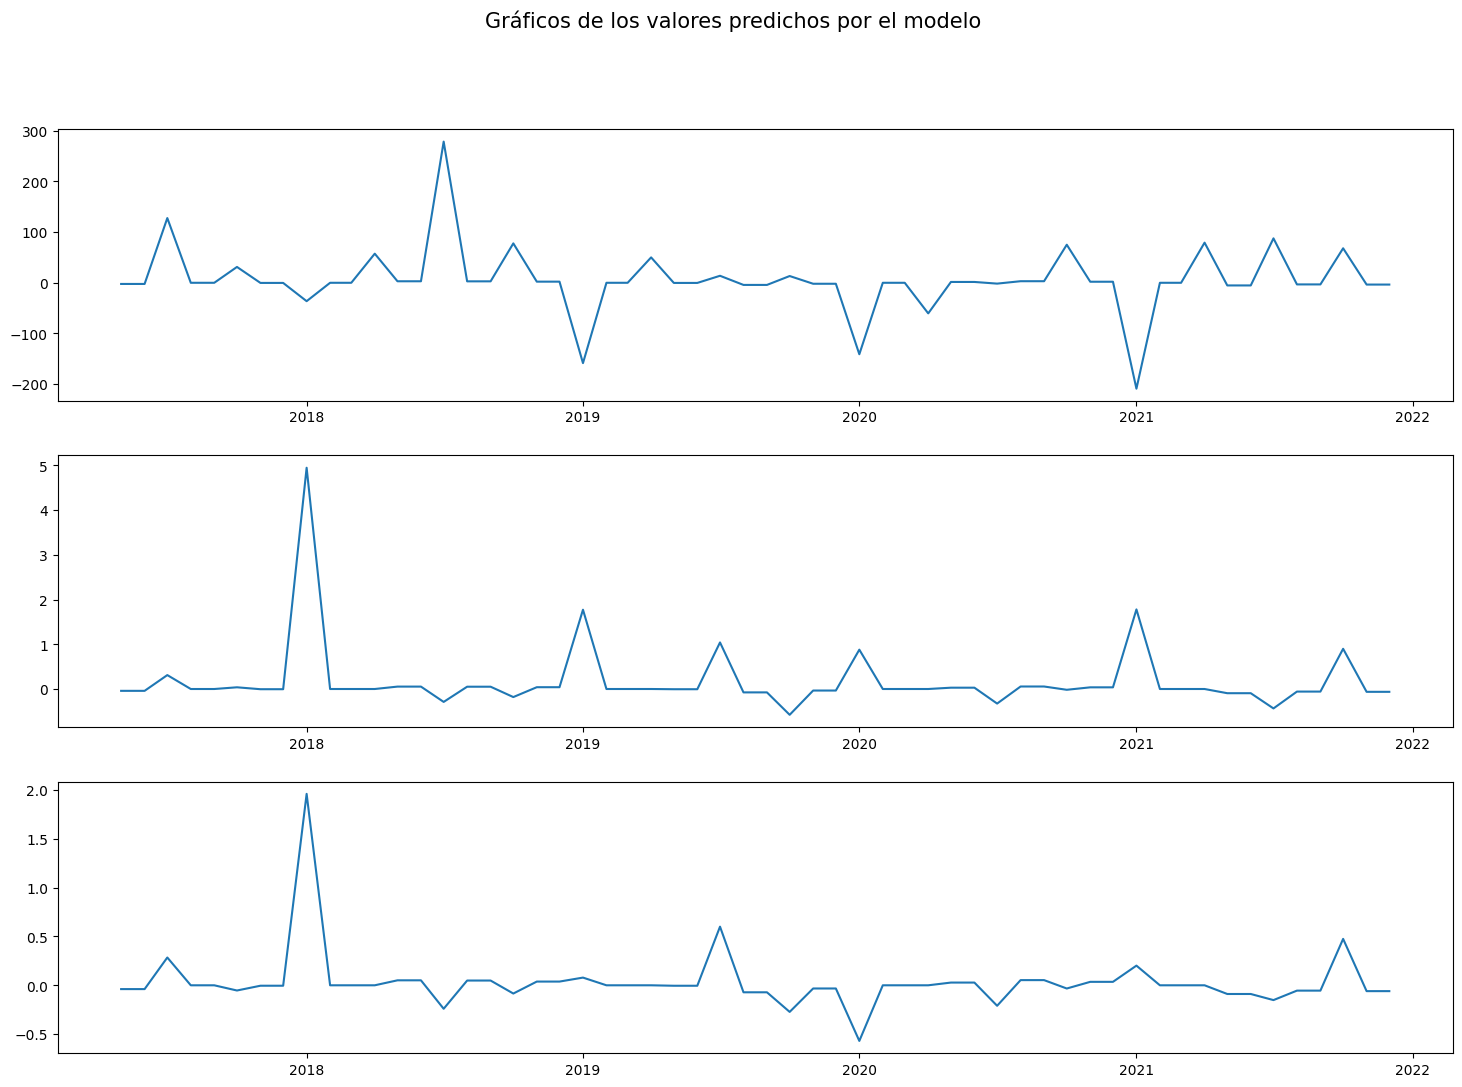

In [42]:
y_fitted = res.fittedvalues
fig, axs = plt.subplots(3)
fig.suptitle('Gráficos de los valores predichos por el modelo',fontsize=15)
fig.set_size_inches(18, 12)
[axs[i].plot(y_fitted.iloc[:,i]) for i in range(3)]
plt.show()

###### Pronósticos a futuro

###### Hallando los pronósticos

Para pronosticar, al modelo VAR le podemos pasar hasta el número de orden de retraso de observaciones de los datos pasados. Esto se debe a que los términos en el modelo VAR son esencialmente los retrasos de las diversas series de tiempo en el conjunto de datos, por lo que debemos proporcionar tantos valores anteriores como lo indique el orden de retraso utilizado por el modelo. De lo contrario estaríamos introduciendo poca fiabilidad.



In [43]:
# Obtener el orden del modelo
lag_order = res.k_ar
print('Orden del modelo:', lag_order)
# Input data para hacer forecasting (pronósticos a futuro)
input_data = X_train_transformed.values[-lag_order:]
# Forecasting
pred = res.forecast(y=input_data, steps=12)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print('Predicciones:')
pred

Orden del modelo: 15
Predicciones:


,Compraventa_Unitario_pred,Internet_pred,Movil_pred
Fecha,,,
2022-01-01,-104.514283,0.422785,-0.737237
2022-02-01,-1.790866,-0.032188,-0.030474
2022-03-01,-1.555841,-0.027964,-0.026475
2022-04-01,-27.142671,0.962864,0.491020
2022-05-01,-1.296577,0.013102,-0.009133
2022-06-01,-0.937019,0.014787,-0.004712
2022-07-01,34.332341,-0.645353,-0.297037
2022-08-01,-0.712774,0.016761,0.009240
2022-09-01,-0.329166,0.015925,0.011595


<Figure size 1200x3000 with 0 Axes>

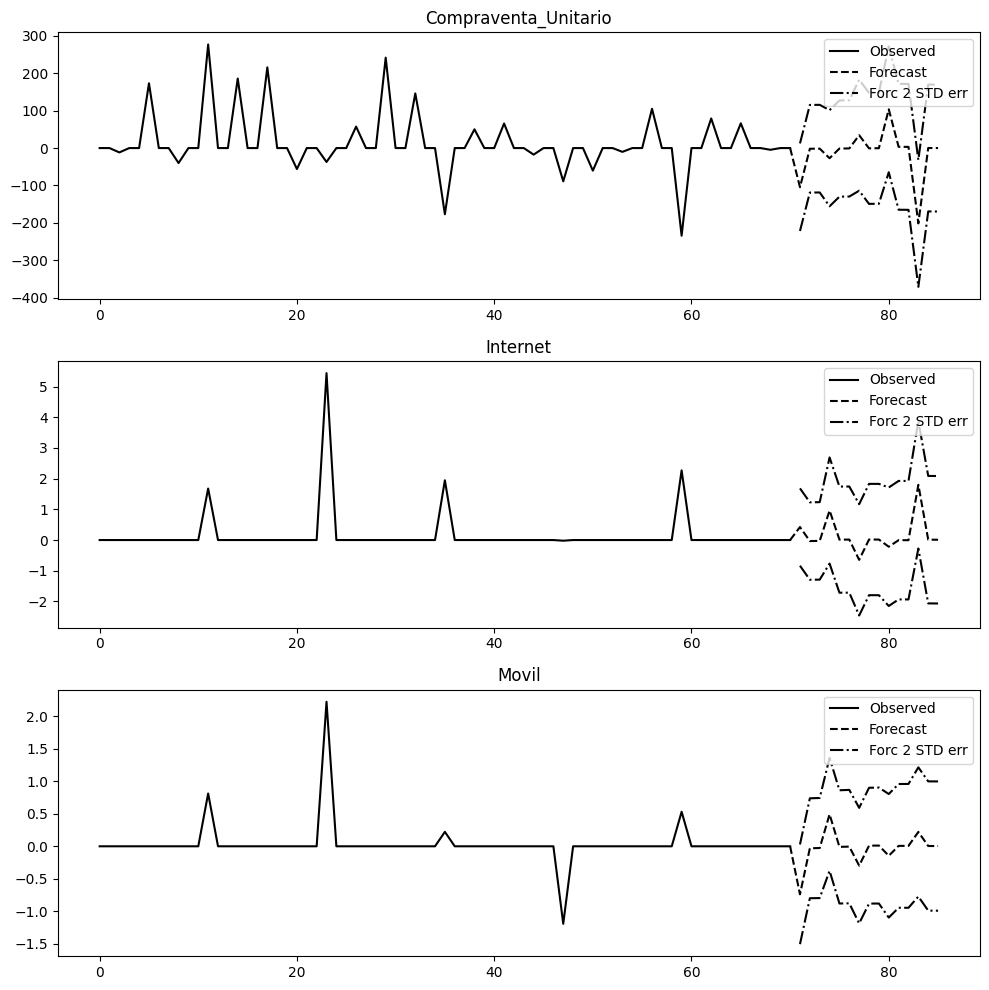

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 30))
res.plot_forecast(lag_order)
plt.tight_layout(h_pad = 1.15)
plt.show()


###### Invirtiendo la transformación de los pronósticos a la escala original


Los pronósticos se generan en la escala de los datos de entrenamiento utilizados por el modelo, es decir, son datos transformados. Entonces, para volver a ponerlos en su escala original, necesitamos des-diferenciarlos. La forma de invertir la diferenciación es sumar estas diferencias consecutivamente al número base. Una forma sencilla de hacerlo es determinar primero la suma acumulada y luego sumarla al número base. Este proceso se puede revertir agregando la observación en el paso de tiempo anterior al difference value. inverted(ts) = differenced(ts) + observation(ts-1)


In [45]:
# Invirtiendo la transformación teniendo en cuenta que hemos diferenciado dos veces
def invert_transformation(ds, df_forecast, second_diff=False):
    for col in ds.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (ds[col].iloc[-1] - ds[col].iloc[-2]) + df_forecast[str(col)].cumsum()

        # Undo the 1st Differencing
        df_forecast[str(col)] = ds[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

In [46]:
pred.columns=X_test.columns
output = invert_transformation(X_train, pred, second_diff=False)
output

,Compraventa_Unitario,Internet,Movil
Fecha,,,
2022-01-01,3535.865169,91.908402,97.935366
2022-02-01,3534.074303,91.876214,97.904892
2022-03-01,3532.518462,91.848250,97.878417
2022-04-01,3505.375791,92.811114,98.369437
2022-05-01,3504.079215,92.824215,98.360303
2022-06-01,3503.142196,92.839002,98.355591
2022-07-01,3537.474537,92.193649,98.058554
2022-08-01,3536.761763,92.210410,98.067794
2022-09-01,3536.432598,92.226335,98.079389


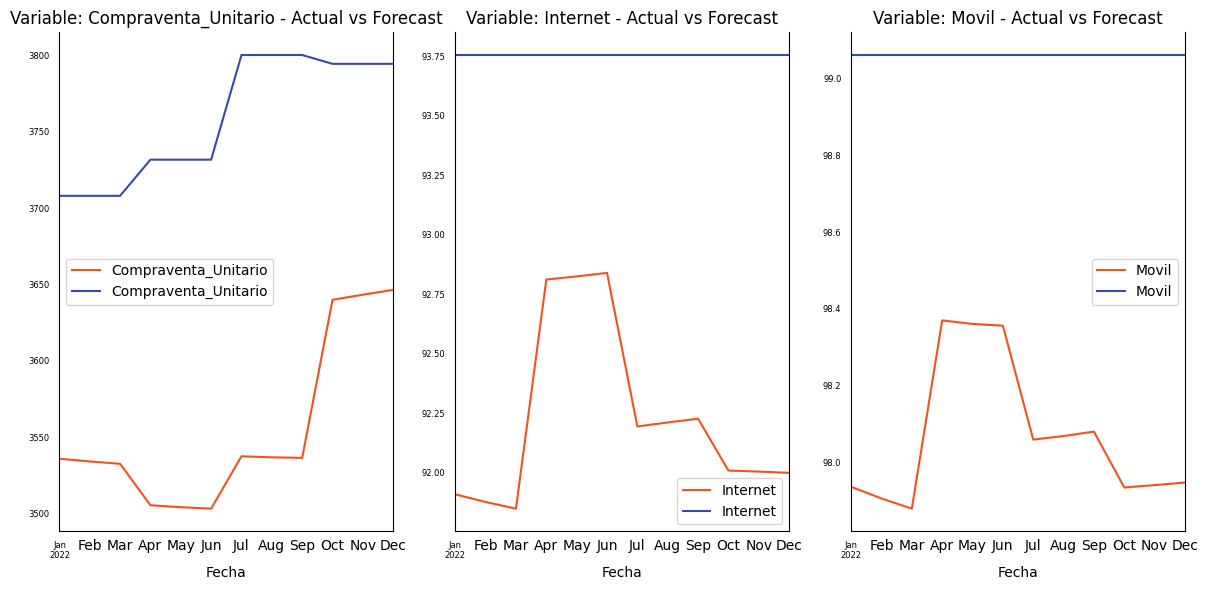

In [47]:
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows = int(len(X_train.columns)/2), ncols = 3, dpi = 100, figsize = (12,6))

for i, (col,ax) in enumerate(zip(X_train.columns, axes.flatten())):
    output[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    X_test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title('Variable: ' + col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.savefig('actual_forecast.png')
plt.show()

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean absolute error:', mean_absolute_error(X_test, output))
print('Root mean squared error:', np.sqrt(mean_squared_error(X_test, output)))

Mean absolute error: 68.88318376822936
Root mean squared error: 120.58162738980967
